# Beginning of competition

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')

In [2]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Plot salesprice distribution

In [3]:
X = data.drop(["SalePrice"], axis=1)
y = data["SalePrice"]

In [4]:
def select_numerical_values(X):
    return X.select_dtypes(include=['float64', 'int64'])

def drop_id(X):
    return X.drop("Id", axis=1)

C:\Users\Jasper\AppData\Local\Temp\ipykernel_18724\4096186479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, color='r', bins=100)


<Axes: xlabel='SalePrice', ylabel='Density'>

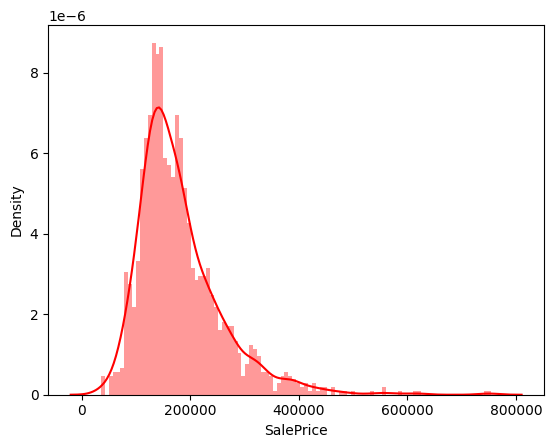

In [5]:
sns.distplot(y, color='r', bins=100)

In [6]:
from sklearn.pipeline import Pipeline, FunctionTransformer

numeric_features_pipeline = Pipeline(steps=[
    ('select_numeric', FunctionTransformer(select_numerical_values)),
    ('drop_id', FunctionTransformer(drop_id))
])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('numeric_features', numeric_features_pipeline),
    ('regressor', RandomForestRegressor())
])

max_depth = [1, 4, 8, 16, None]
n_estimators = [2, 50, 100, 200, 500]

grid = {
    "regressor__max_depth": max_depth,
    "regressor__n_estimators": n_estimators 
}

gridSearch = GridSearchCV(estimator=pipeline, param_grid=grid, n_jobs=-1, scoring="neg_root_mean_squared_error")


In [9]:
searchResult = gridSearch.fit(X_train, y_train)
bestModel = searchResult.best_estimator_

In [10]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('numeric_features',
                 Pipeline(steps=[('select_numeric',
                                  FunctionTransformer(func=<function select_numerical_values at 0x0000021CD4812A20>)),
                                 ('drop_id',
                                  FunctionTransformer(func=<function drop_id at 0x0000021CE388D300>))])),
                ('regressor', RandomForestRegressor())])

In [11]:
prediction = pipeline.predict(X_test)
predictionopti = bestModel.predict(X_test)

In [12]:
from sklearn.metrics import root_mean_squared_error

raw = root_mean_squared_error(prediction, y_test)
tuned = root_mean_squared_error(predictionopti, y_test)

print(raw)
print(tuned)

32740.229947937027
31849.72000358991


# Prediction for submission

In [15]:
X_submission = pd.read_csv('test.csv')
submission_prediction = pipeline.predict(X_submission)

submission_dict = {'Id': X_submission['Id'], 'SalePrice': submission_prediction}
submission_df = pd.DataFrame(submission_dict)

submission_df.to_csv('submission.csv', index=False)


2035726148.724555